### Code for generation of supplementary Figure 4
_Single cell trajectory mapping of human pluripotent stem cells differentiating towards lung and hepatocyte progenitors_,
bioArxiv Preprint. <br> 
Chaido Ori, Meshal Ansari, Ilias Angelidis, Fabian J. Theis, Herbert B. Schiller and Micha Drukker

In [1]:
## Notebook that generates Supplementary Figure 4 in Ori et al., 2021
## Based on FE and ELP stage object generated in generate_subsets.ipyngb

## Following Table is expanded:
#  data/Suppl_Table_5_marker_table.xlsx

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import IPython

from matplotlib import colors
gray_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N = 128)

### Read in data object

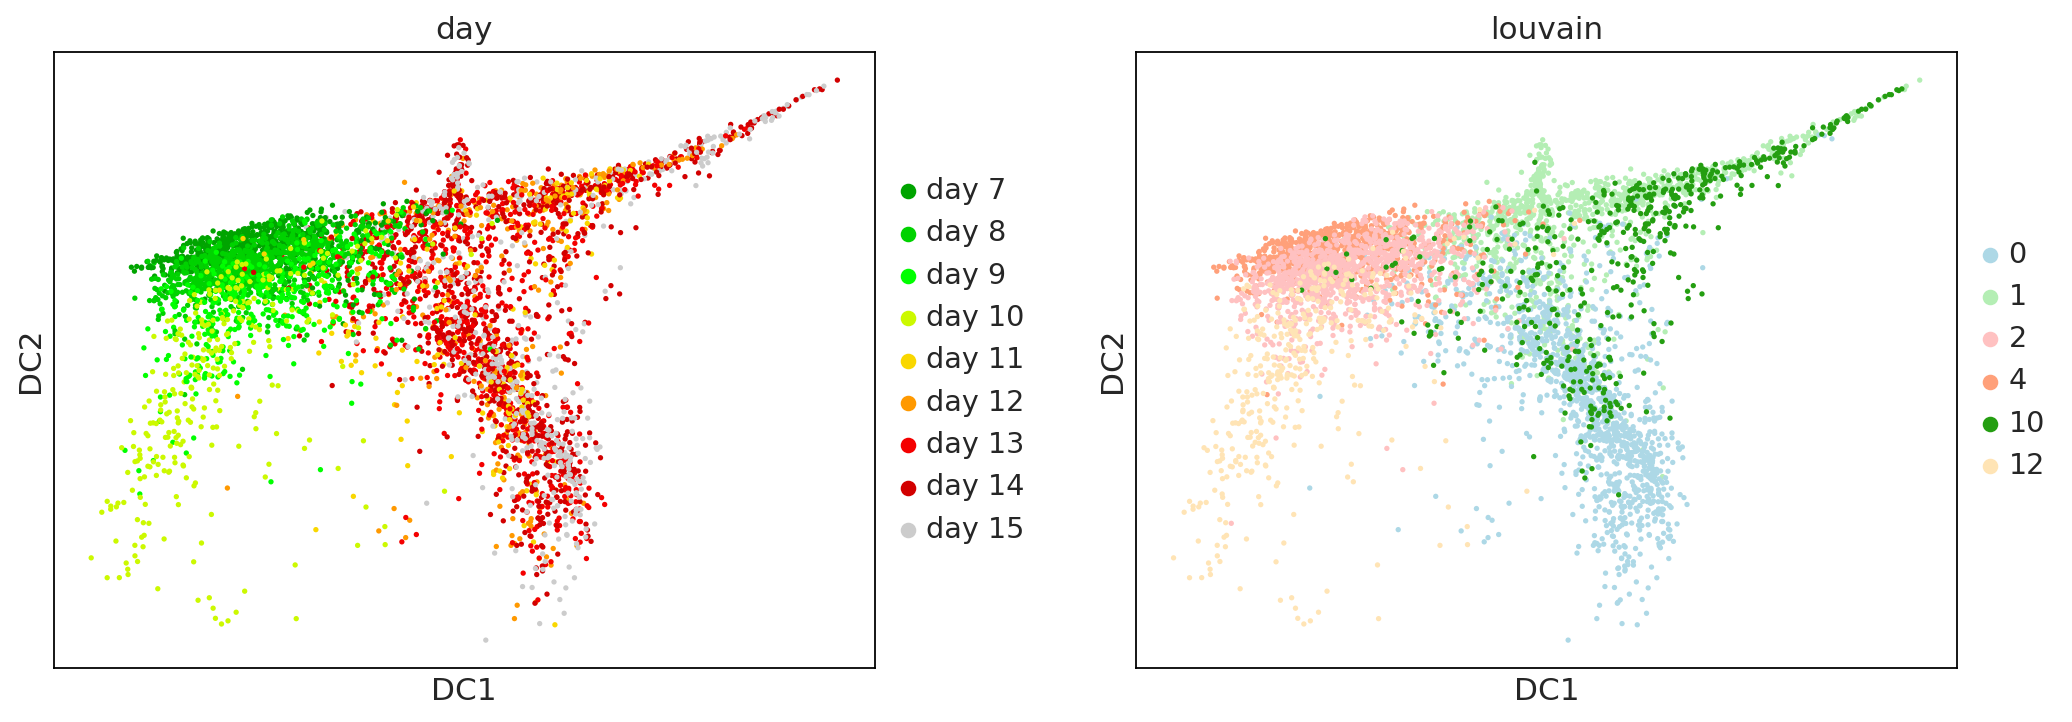

In [11]:
IPython.display.set_matplotlib_formats("png2x", quality = 90)
plt.rcParams["figure.figsize"] = (6.5, 5)

folder = "/20200806_Drukker_IPSlungProgenitors_meshal.ansari/"
sub = sc.read(folder + "IPS_lung_differentiation_forendo_elungpro.h5ad")
sc.pl.diffmap(sub, color = ["day", "louvain"], wspace = 0.2)

### Supplementary Figure 4 a - Marker genes for cluster in subset

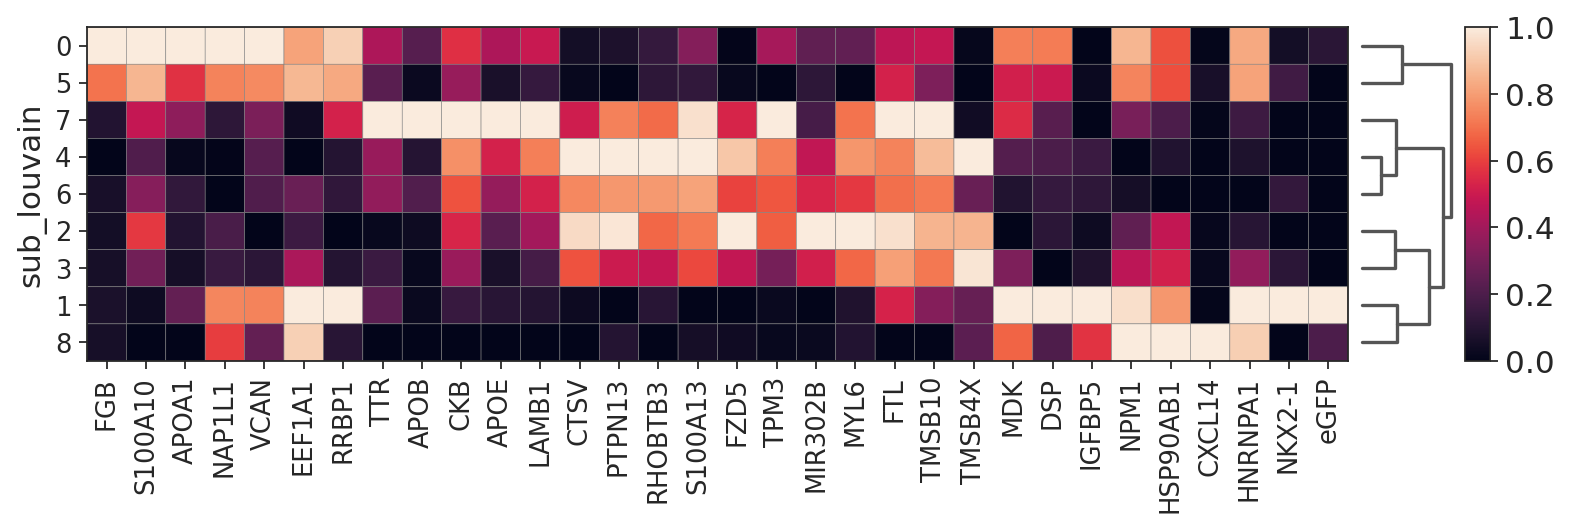

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[10.24, 0.8, 0.2])

In [5]:
sc.tl.rank_genes_groups(sub, groupby = "sub_louvain", n_genes = 100, method = "wilcoxon", use_raw = True)
result = sub.uns['rank_genes_groups']
allMarkers = []
for cluster in result['names'].dtype.names:
    current = pd.DataFrame({"gene": result["names"][cluster], "score": result["scores"][cluster],
                            "logfoldchange": result["logfoldchanges"][cluster], "pval": result["pvals"][cluster],
                            "pval_adj": result["pvals_adj"][cluster], "cluster": cluster})
    allMarkers.append(current)
allMarkers = pd.concat(allMarkers)
allMarkers = allMarkers[allMarkers.pval_adj < 0.1].copy()

## Take out ribosomal and mitochondrial Genes from plot
rbmt_genes = [name for name in sub.var_names if name.startswith('RP') | name.startswith('MT-')]
allMarkers = allMarkers[~allMarkers.gene.isin(rbmt_genes)]

## Get ordering as in Dendrogram
sc.tl.dendrogram(sub, groupby = "sub_louvain")
order = sub.uns["dendrogram_sub_louvain"]["dendrogram_info"]["ivl"]

## Get top genes from Markers Table
genes = []
for typ in order:
    curgenes = allMarkers.loc[allMarkers.cluster == typ, "gene"].values[0:5]
    genes = genes + [g for g in curgenes if g not in genes]
    
sb.set_style("ticks")
sc.pl.matrixplot(sub, var_names = genes + ["NKX2-1", "eGFP"], standard_scale = "var",
                 groupby = "sub_louvain", dendrogram = True)

### Supplementary Figure 4 b - Diffusion map DC1 vs DC2

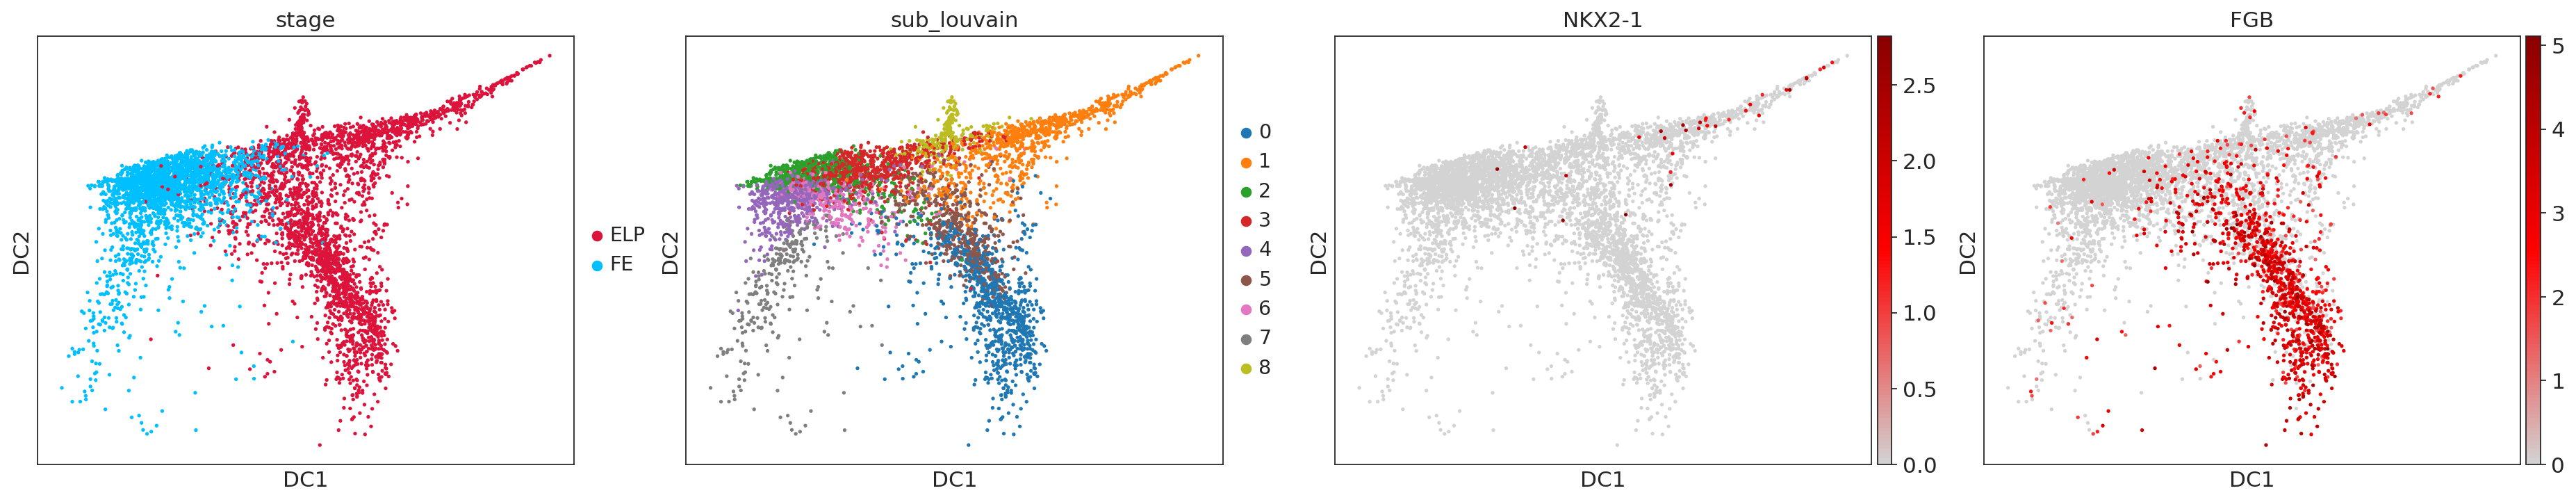

In [7]:
sc.pl.diffmap(sub, color = ["stage", "sub_louvain", "NKX2-1", "FGB"], cmap = gray_red, wspace = 0.1)

### Supplementary Figure 4 c - Diffusion map DC2 vs DC3

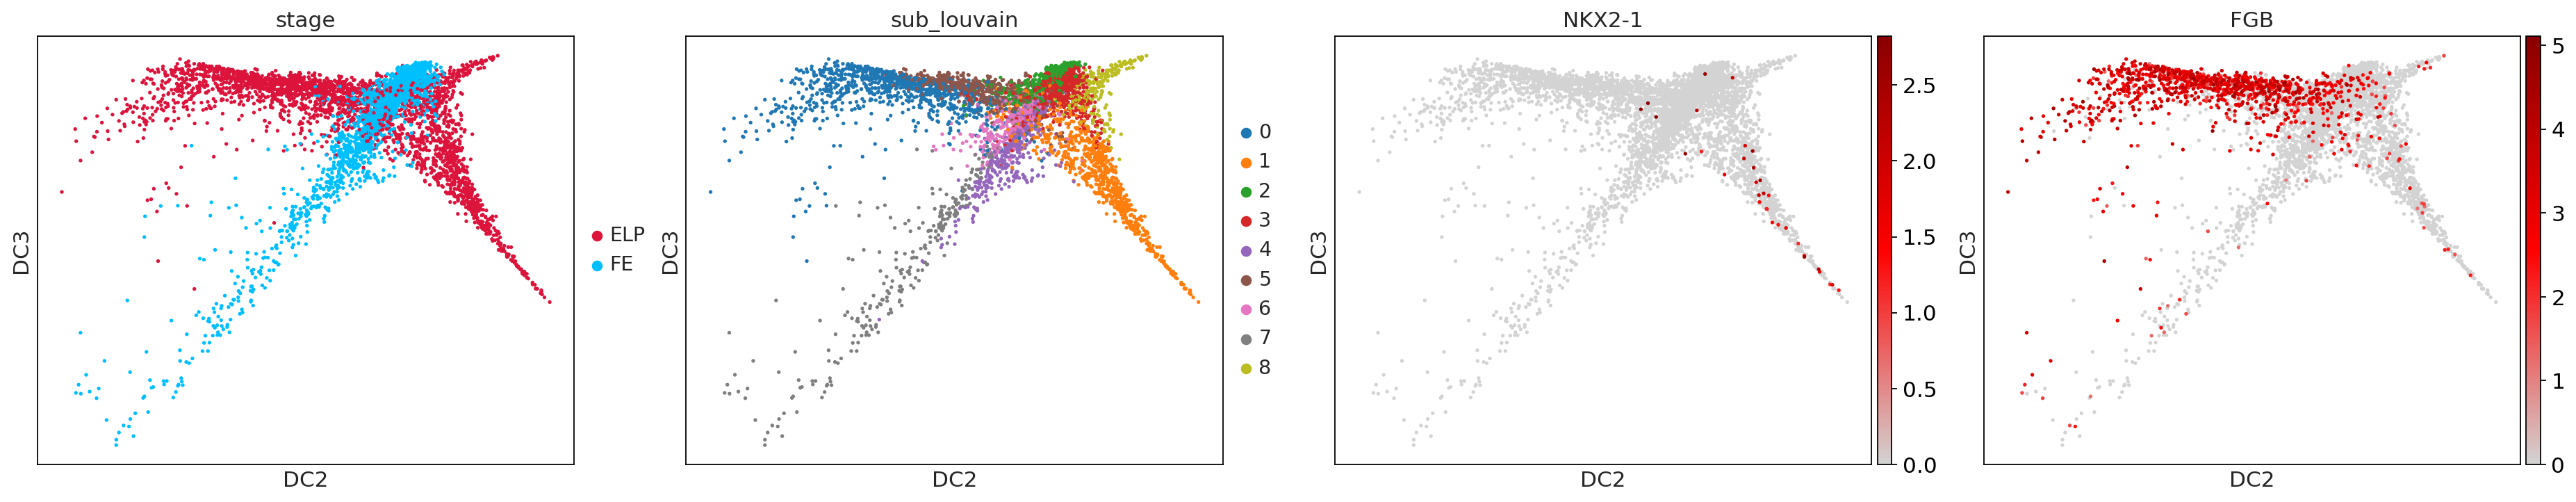

In [10]:
sc.pl.diffmap(sub, color = ["stage", "sub_louvain", "NKX2-1", "FGB"], 
              cmap = gray_red, wspace = 0.1, components = "2,3")